__Homework 3__ \
Xue Ni

## Objective

(a) Build numeric prediction models that predict Spending based on the other available customer information. Use linear regression, k-NN, regression tree, SVM regreesion and Neural Network and ensembling models. Briefly discuss your explorations and present the best result (best predictive model) for each of the three techniques. Compare the techniques; which of them provides the best predictive performance? Please make sure you use best practices for predictive modeling. (I.e., do you need to set which hyper-parameter? Normalize? Feature Selection? Etc.)

(b) As a variation on this exercise, create a separate “restricted” dataset (i.e., a subset of the original dataset), which includes only purchase records (i.e., where Purchase = 1). Build numeric prediction models to predict Spending for this restricted dataset.

Attributes description:


| Codelist |                      |                                                       |               |                  |
|----------|----------------------|-------------------------------------------------------|---------------|------------------|
| Var. #   | Variable Name        | Description                                           | Variable Type | Code Description |
| 1.       | US                   | Is it a US address?                                   | binary        | 1: yes   0: no   |
| 2 - 16   | Source_*             | Source catalog for the record                         | binary        | 1: yes   0: no   |
|          |                      | (15 possible sources)                                 |               |                  |
| 17.      | Freq.                | Number of transactions in last year at source catalog | numeric       |                  |
| 18.      | last_update_days_ago | How many days ago was last update to cust. record     | numeric       |                  |
| 19.      | 1st_update_days_ago  | How many days ago was 1st update to cust. record      | numeric       |                  |
| 20.      | Web_order            | Customer placed at least 1 order via web              | binary        | 1: yes   0: no   |
| 21.      | Gender=mal           | Customer is male                                      | binary        | 1: yes   0: no   |
| 22.      | Address_is_res       | Address is a residence                                | binary        | 1: yes   0: no   |
| 23.      | Purchase             | Person made purchase in test mailing                  | binary        | 1: yes   0: no   |
| 24.      | Spending             | Amount spent by customer in test mailing ($)          | numeric       |                  |

## Load and prepare data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

In [2]:
raw = pd.read_excel('HW3.xlsx')

In [3]:
raw.shape

(2000, 25)

Let's check for missing data. I hope that the information about the data is full. Well ...

Luck is definitely on my side! So we have a great set of data and the mood to experiment. Price is always important. The more they spend the better lol. Certainly not for buyers. Let's look at the spending distribution.

In [5]:
raw.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


In [3]:
data = raw.drop(['sequence_number'],axis=1)
data.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


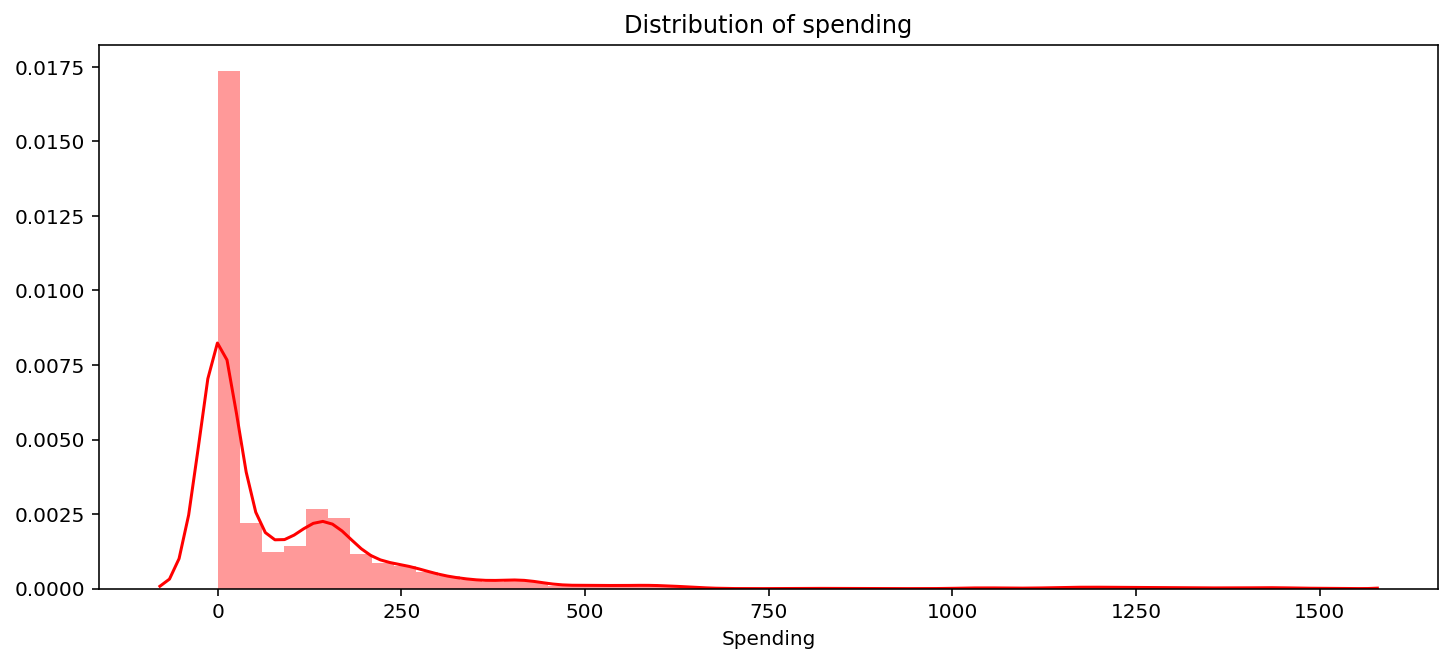

In [46]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

pl.figure(figsize=(12,5))
pl.title("Distribution of spending")
ax = sns.distplot(data["Spending"], color = 'r')

Transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12646bba8>,
      dtype=object)

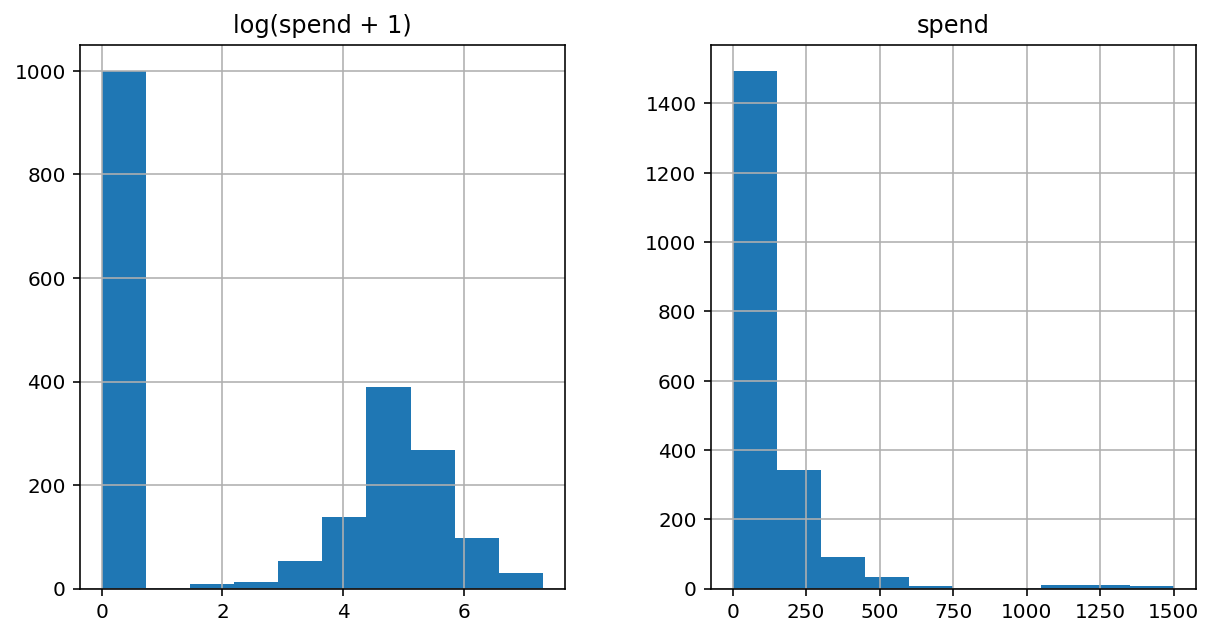

In [8]:
rcParams['figure.figsize'] = (10, 5)
spend = pd.DataFrame({"spend":data["Spending"], "log(spend + 1)":np.log1p(data["Spending"])})
spend.hist()

After a quick look at the data, it is easy to identify that 'Diagnosis' label is our class label.

## Data Exploration

In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

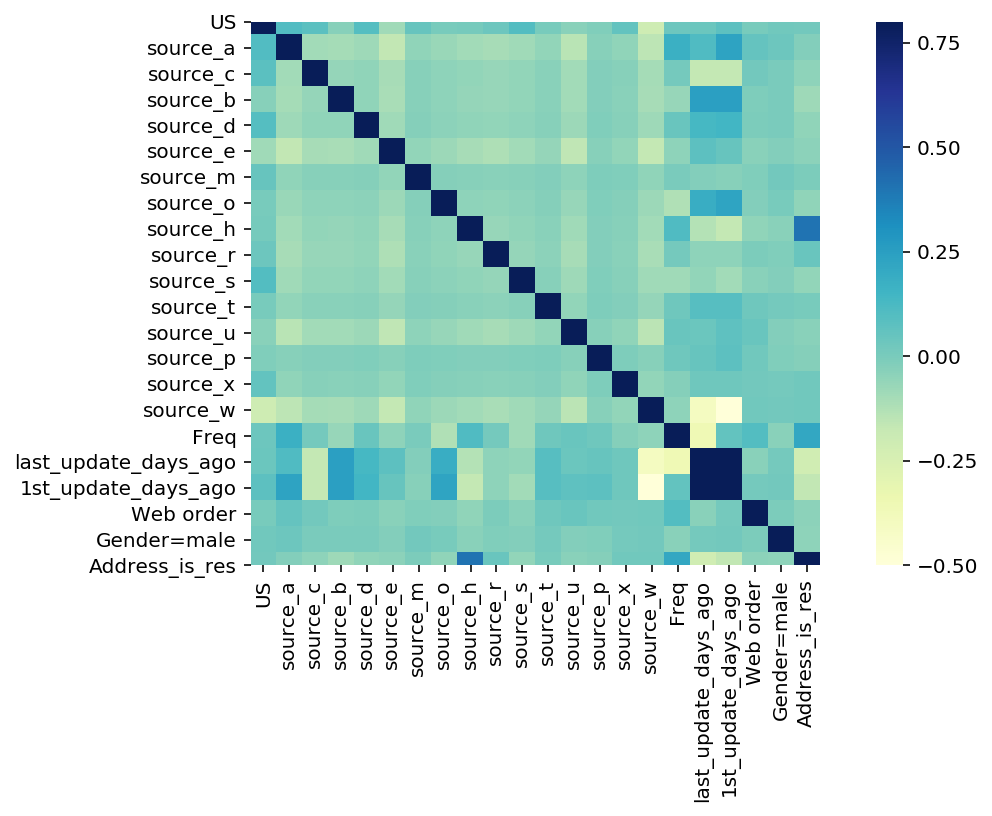

In [9]:
corrmat = data.iloc[:, :-2].corr()
sns.heatmap(corrmat, vmax=.8, square=True,cmap="YlGnBu")

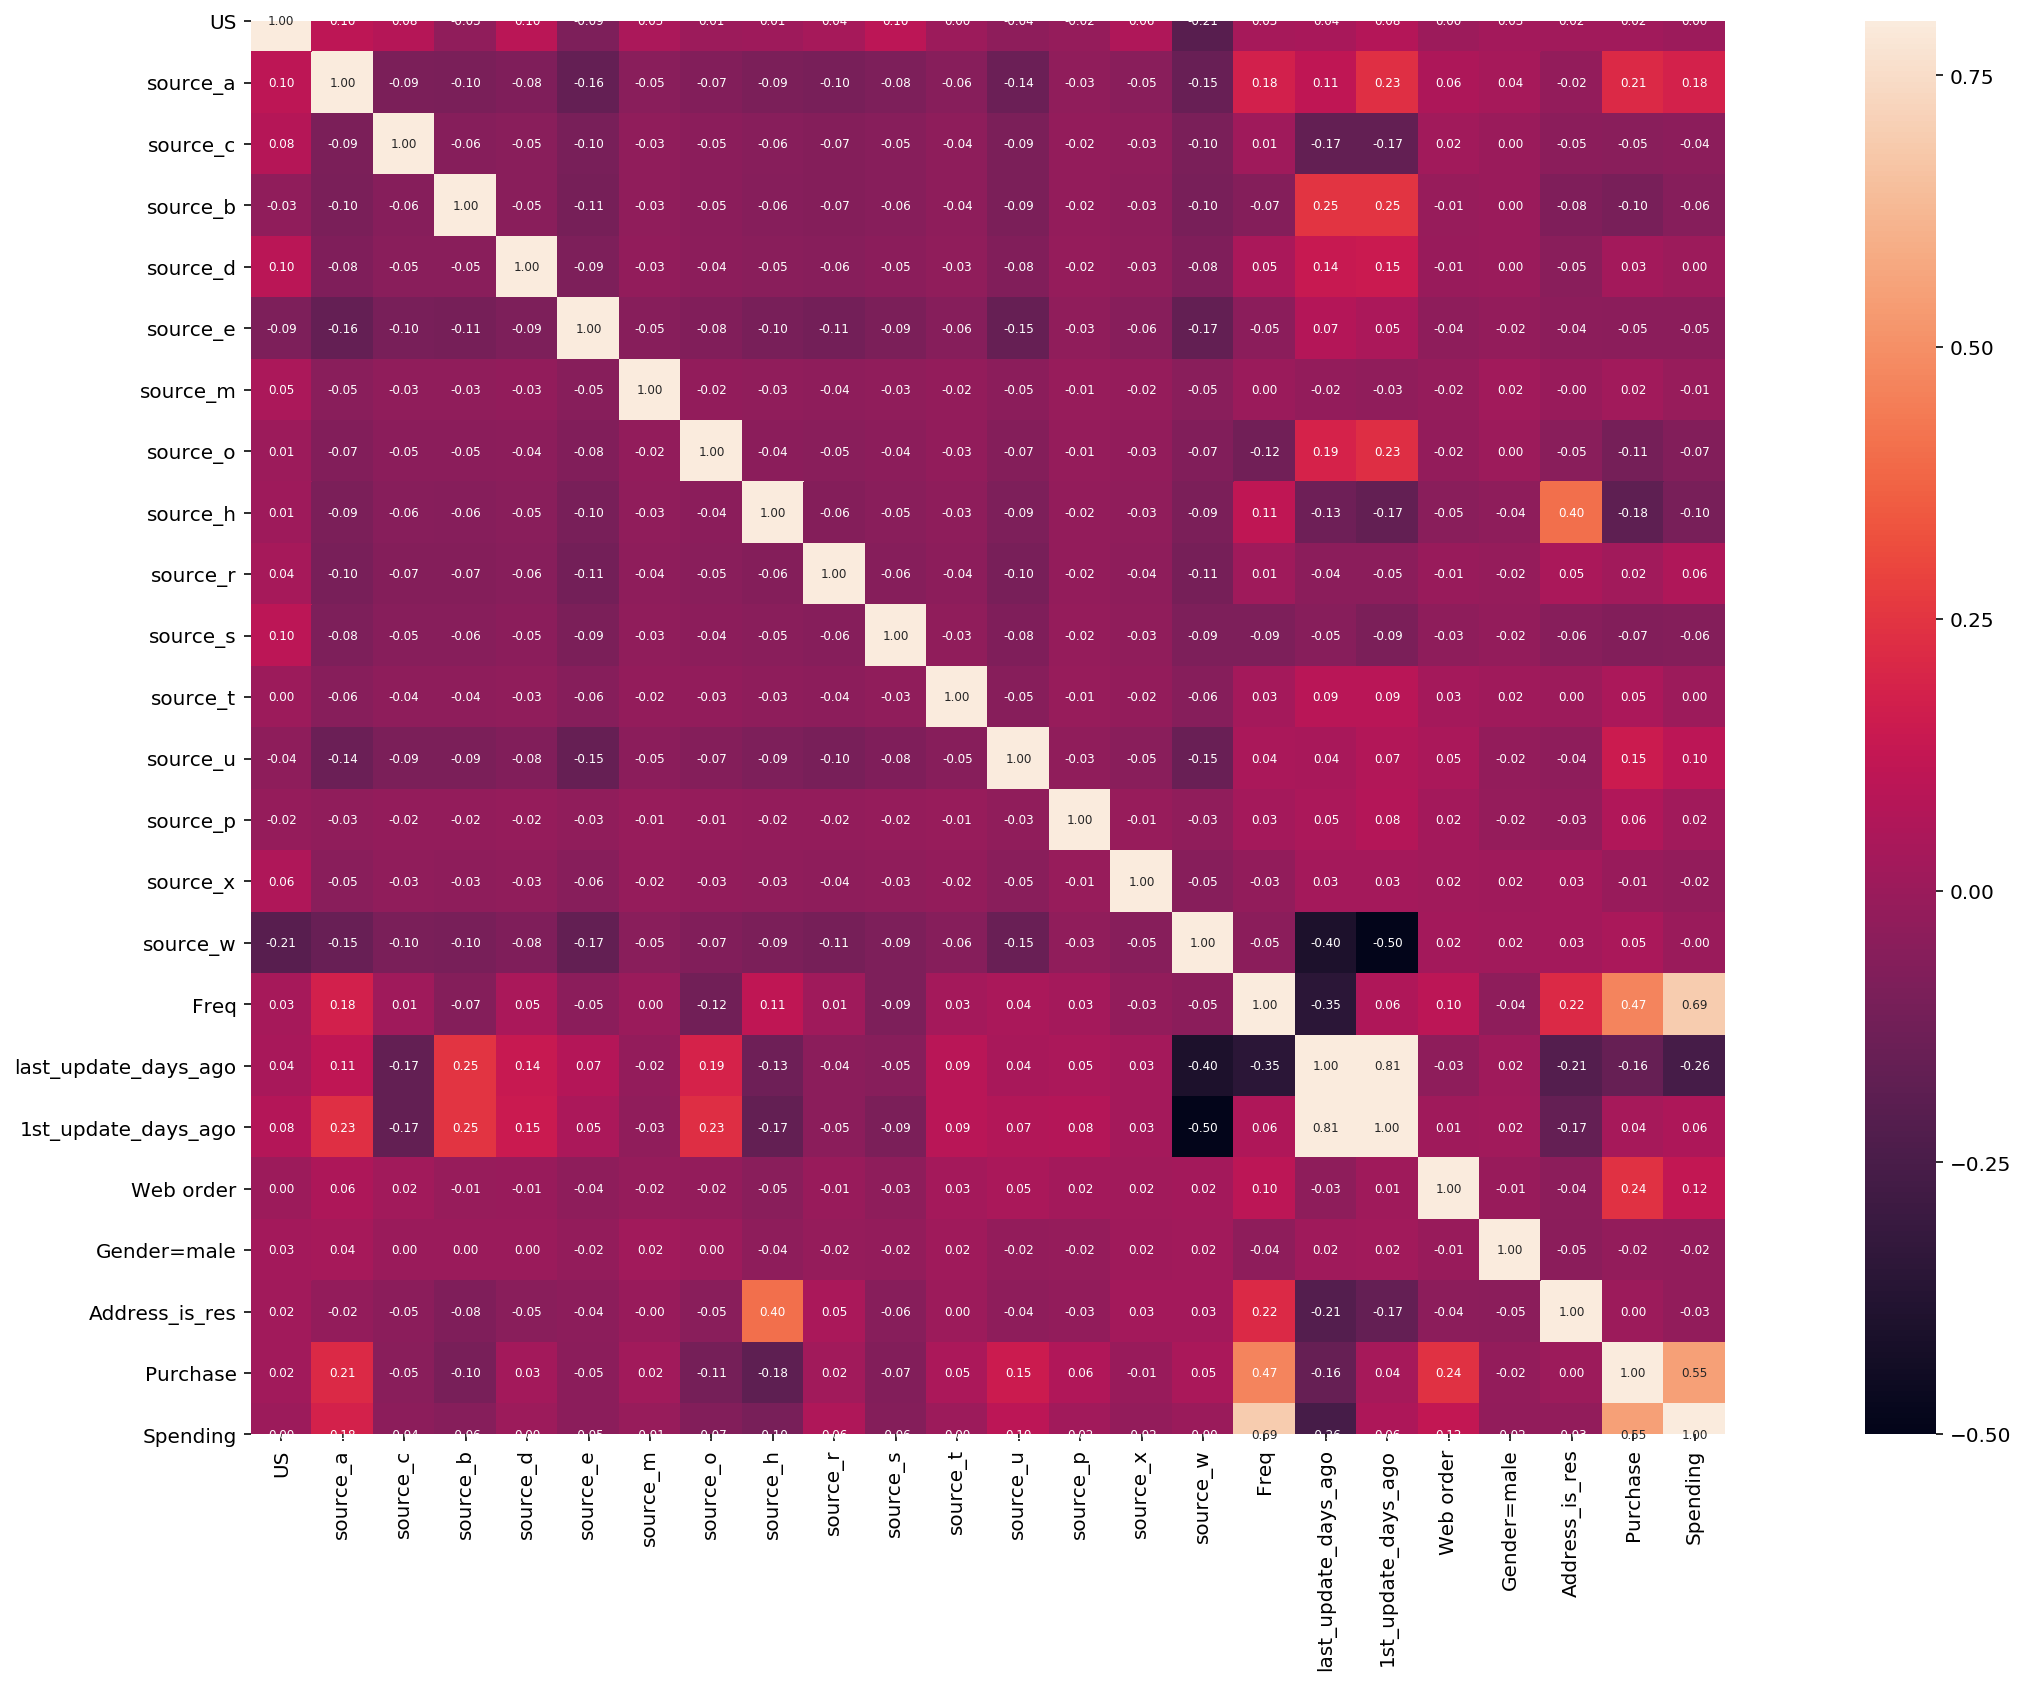

In [10]:
from sklearn import preprocessing
corrmat = data.corr()
f, ax = plt.subplots(figsize=(25, 13))
sns.heatmap(corrmat, vmax=0.8, square=True,annot=True, \
                 fmt='.2f', annot_kws={'size': 6})

From the correlation matrix, for source dimensions, only "source a, o, h, u" have slim relationships with Spending variable, so I'll try to drop other source varibles at first.
Also, '1st time update'and 'gender' has little influence(|coefficient| < .1) on Spending, we can probably drop them as well.

## Data Scale and Split

In [4]:
X = data.iloc[:,:-2]
y = data['Spending']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [212]:
from sklearn.preprocessing import MinMaxScaler

# normalizing data

normalized_features = ['Freq', 'last_update_days_ago', '1st_update_days_ago']

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
#X[normalized_features] = scaler.fit_transform(X[normalized_features])

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X = scaler.fit_transform(X)

##  Modeling I

Now we are going to use regularized linear regression models. I'm going to try both Lasso and Ridge regression. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning parameters.

### Metrics Function

In [17]:
from sklearn.model_selection import cross_validate,cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_test(model):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return(rmse)

### Linear Regression

In [176]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

model_linear = linear_model.LinearRegression()

linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# The coefficients
print('Coefficients: \n', linear.coef_)
# The mean squared error
print("Root Mean squared error: {0:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
      
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-9.66797201e+00  3.47996224e+01 -4.22832433e+01  7.42592420e-01
 -2.66122724e+01 -2.63360675e+00 -5.81700997e+00  3.07125624e+01
 -1.13953460e+02  4.52797508e+01 -1.94341893e+01  2.81378353e+00
  3.58692888e+01 -9.27947807e+00  6.48020721e+00 -2.64661592e-01
  1.36672917e+03 -5.15116227e+01 -9.63235750e+00  1.02022587e+01
 -1.26469343e-01 -6.35417139e+01]
Root Mean squared error: 126.64
Variance score: 0.52


### Ridge Regression

Text(0, 0.5, 'rmse')

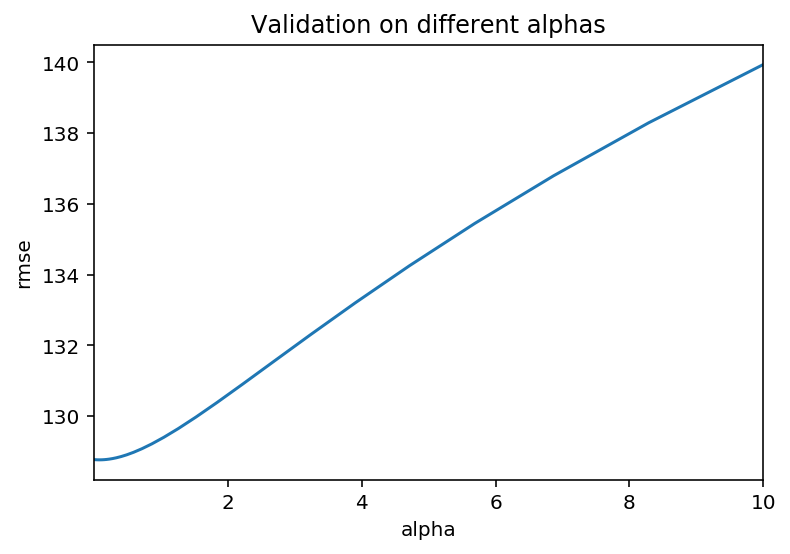

In [24]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

model_ridge = Ridge()

alphas = np.logspace(-3,1,50)
#alphas = [0.01,0.05, 0.08, 0.1,0.2, 0.3,0.4,0.5,0.8, 1, 1.5,2,2.5, 3,4, 5,8, 10,13, 15,20,25, 30,40, 50, 60,75,80]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation on different alphas")
plt.xlabel("alpha")
plt.ylabel("rmse")

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data.  
If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 30 is about right based on the plot above.

In [32]:
from sklearn.linear_model import Ridge, RidgeCV

ridgecv = RidgeCV(scoring = 'neg_mean_squared_error', normalize = True)

ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [41]:
model_ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
model_ridge.fit(X_train, y_train)
rmse_ridge = rmse_test(model_ridge)
print("Test rmse for Ridge: {0:.2f}".format(rmse_ridge))
print('Test R^2 for Ridge model is {0:.2%}'.format(r2_score(y_test, model_ridge.predict(X_test))))

Test rmse for Ridge: 124.03
Test R^2 for Ridge model is 53.55%


So for the Ridge regression we get a rmsle of about 124.03



### Lasso Regression

Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [34]:
from sklearn.linear_model import Lasso, LassoCV

alphas = np.linspace(1,15,30)

lassocv = LassoCV(alphas=alphas)
lassocv.fit(X_train, y_train)

/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([ 1.        ,  1.48275862,  1.96551724,  2.44827586,  2.93103448,
        3.4137931 ,  3.89655172,  4.37931034,  4.86206897,  5.34482759,
        5.82758621,  6.31034483,  6.79310345,  7.27586207,  7.75862069,
        8.24137931,  8.72413793,  9.20689655,  9.68965517, 10.17241379,
       10.65517241, 11.13793103, 11.62068966, 12.10344828, 12.5862069 ,
       13.06896552, 13.55172414, 14.03448276, 14.51724138, 15.        ]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [39]:
model_lasso = Lasso(alpha = lassocv.alpha_)
model_lasso.fit(X_train, y_train)

rmse_lasso = rmse_test(model_lasso)
print("Test rmse for Lasso: {0:.2f}".format(rmse_test(model_lasso)))
print('Test R^2 for Lasso model is {0:.2%}'.format(r2_score(y_test, model_lasso.predict(X_test))))

Test rmse for Lasso: 124.00
Test R^2 for Lasso model is 53.57%


The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. Let's take a look at the coefficients:

In [42]:
coef = pd.Series(model_lasso.coef_, index=data.iloc[:,:-2].columns)

In [43]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  \
      str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 12 variables


Good job Lasso.  One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.


We can also take a look directly at what the most important coefficients are:



In [44]:
imp_coef = pd.concat([coef.sort_values()])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

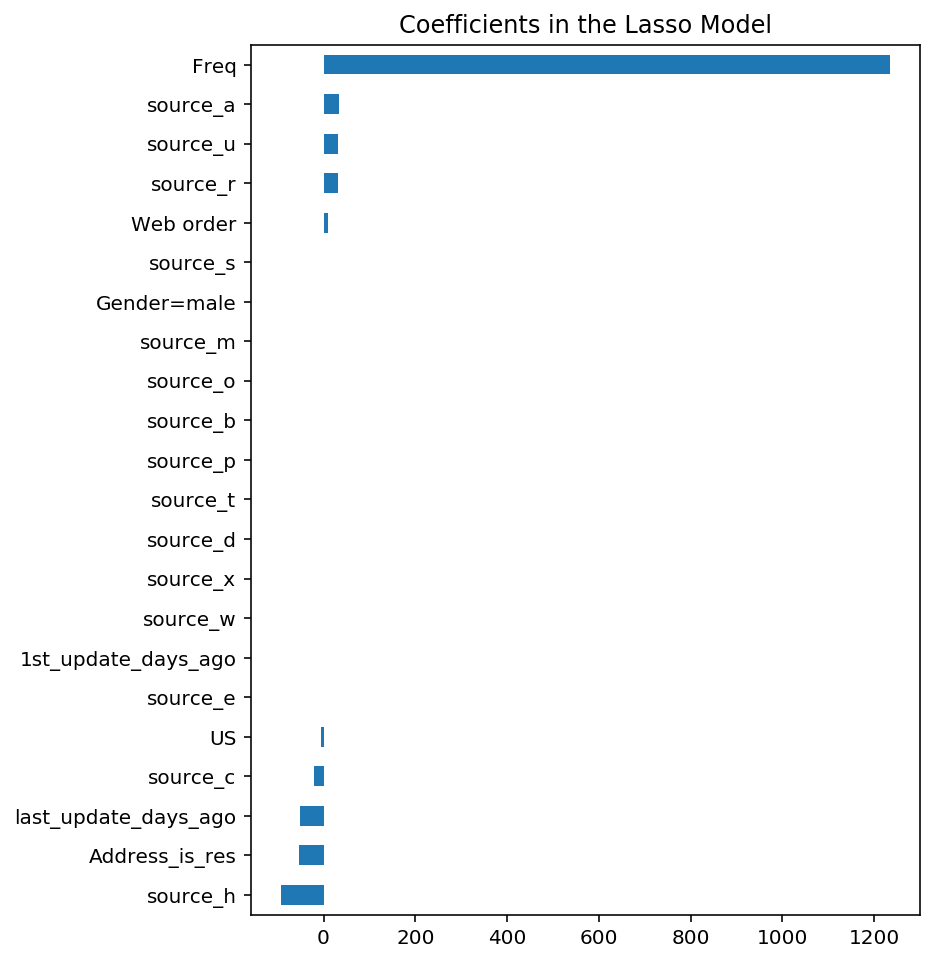

In [47]:
rcParams['figure.figsize'] = (6,8)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

The most important positive feature is `Freq` -  Number of transactions in last year at source catalog. This makes sense. Then a few other source variables and web order history features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.

Also note that unlike the feature importance you'd get from a random forest these are _actual_ coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret. 

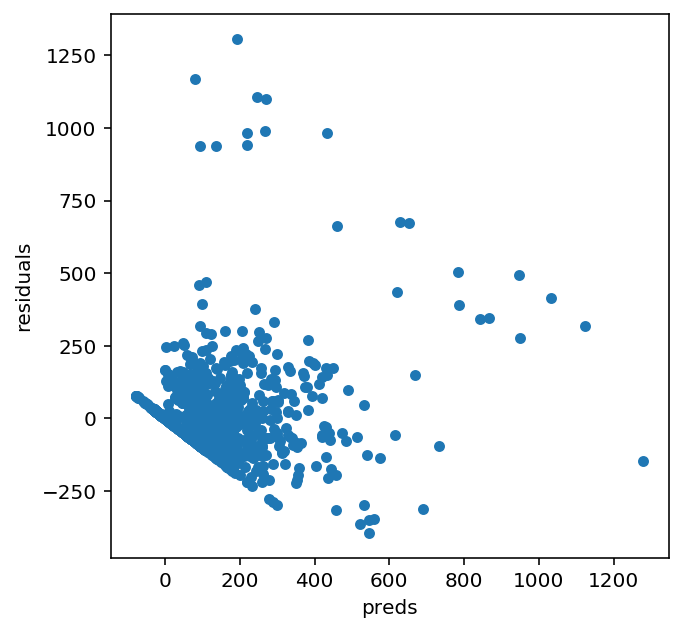

In [48]:
#let's look at the residuals as well:
rcParams['figure.figsize'] = (5,5)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

### Regression Tree

Text(0, 0.5, 'rmse')

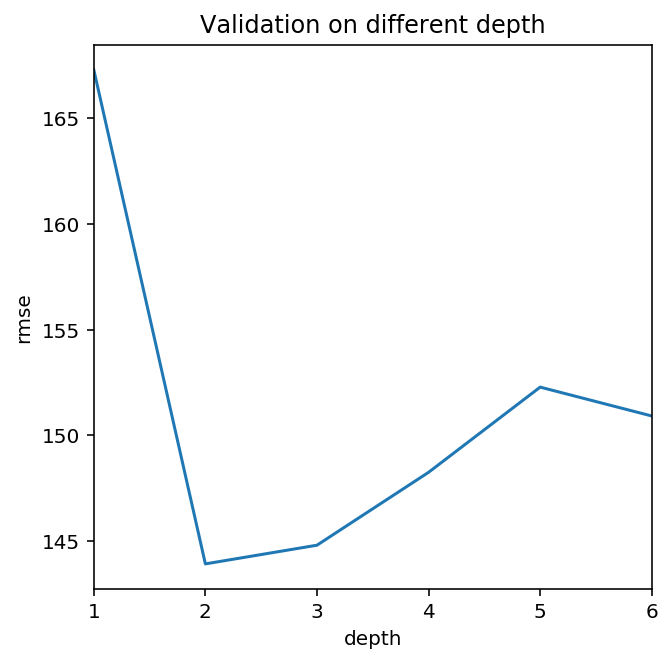

In [49]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor()

max_depth = [1,2,3,4,5,6]
cv_tree=[]

for depth in max_depth:
    cv_tree.append(rmse_cv(DecisionTreeRegressor(max_depth = depth)).mean())
    
cv_tree = pd.Series(cv_tree, index = max_depth)
cv_tree.plot(title = "Validation on different depth")
plt.xlabel("depth")
plt.ylabel("rmse")

In [52]:
from sklearn.metrics import mean_squared_error

model_tree = DecisionTreeRegressor(max_depth = 2)
model_tree.fit(X_train,y_train)

rmse_tree = rmse_cv(model_tree).mean()

print("Test rmse for Regression Tree: {0:.2f}".format(rmse_test(model_tree)))
print('Test R^2 for Regression Tree is {0:.2%}'.format(r2_score(y_test, model_tree.predict(X_test))))

Test rmse for Regression Tree: 133.22
Test R^2 for Regression Tree is 46.41%


### K-NN

Text(0, 0.5, 'rmse')

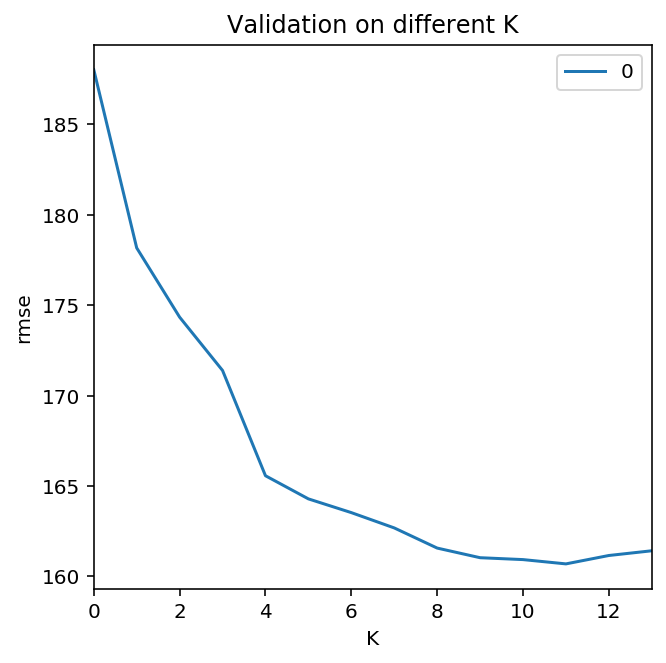

In [55]:
from sklearn import neighbors

rmse_val = [] #to store rmse values for different k

for K in range(1,15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    #pred=model.predict(X_test) #make prediction on test set
    #error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    
    error= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5)).mean()
    #error = rmse_cv(model)
    
    rmse_val.append(error) #store rmse values
#    print('RMSE value for k= ' , K , 'is:', error)

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot(title = "Validation on different K")
plt.xlabel("K")
plt.ylabel("rmse")

In [56]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(1,15))}

knn = neighbors.KNeighborsRegressor()

knn_gscv = GridSearchCV(knn, params, cv=5, scoring='neg_mean_squared_error')
knn_gscv.fit(X_train,y_train)

print('Best parameter is', knn_gscv.best_params_)

print('rmse with the best estimator is {}'.format(np.sqrt(-knn_gscv.best_score_)))

Best parameter is {'n_neighbors': 7}
rmse with the best estimator is 170.99223751323674


In [58]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, y_train)

rmse_knn = rmse_test(model_knn).mean()
r2_knn = r2_score(y_test, model_tree.predict(X_test))

print("Test rmse for KNN: {0:.2f}".format(rmse_knn))
print('Test R^2 for KNN is {0:.2%}'.format(r2_knn))

Test rmse for KNN: 172.78
Test R^2 for KNN is 46.41%


### SVM regreesion

In [15]:
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.svm import SVR

parameters = [{'kernel': ['rbf'], 
               'gamma': 10. ** np.arange(-5, 4),
               'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['linear'], 
               'C': [0.1,  1, 10, 100, 1000]}]

svr_gscv = GridSearchCV(SVR(), parameters, cv=5, scoring=score,refit='neg_mean_squared_error')
svr_gscv.fit(X_train, y_train)
print("Best parameters set found on development set:\n")
print(svr_gscv.best_params_)
print("\nGrid scores on development set:\n")
means = svr_gscv.cv_results_['mean_test_score']
stds = svr_gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svc_gscv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

{'mean_fit_time': array([0.07012053, 0.06017714, 0.06110797, 0.06051831, 0.06240983,
       0.06453133, 0.0640636 , 0.06866717, 0.0456285 , 0.06243753,
       0.05829215, 0.0646862 , 0.06024323, 0.06215835, 0.05659609,
       0.06130362, 0.06727829, 0.0485918 , 0.06574068, 0.06263251,
       0.06230083, 0.05811124, 0.06143541, 0.06596866, 0.0614655 ,
       0.06924791, 0.04639544, 0.05996208, 0.05833077, 0.06397967,
       0.06271996, 0.06656861, 0.06606998, 0.07540421, 0.1037487 ,
       0.08517008, 0.0638587 , 0.06824417, 0.06957302, 0.06904778,
       0.10138173, 0.13432784, 0.25961742, 0.38992052, 0.17724504,
       0.05134196, 0.04835324, 0.05326877, 0.23798404, 2.97870011]), 'std_fit_time': array([3.69490229e-03, 2.17276615e-03, 2.21464062e-03, 5.12850950e-03,
       4.75073323e-03, 5.66894870e-04, 3.86226428e-03, 3.85995875e-03,
     

In [15]:
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.svm import SVR

#svr = SVR(kernel='rbf', C=100, gamma=0.01)
model_svr = SVR(kernel='linear', C=1000)

model_svr.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
rmse_svr = rmse_test(model_svr).mean()
r2_svr = r2_score(y_test, model_svr.predict(X_test))

print("Test rmse for KNN: {0:.2f}".format(rmse_svr))
print('Test R^2 for KNN is {0:.2%}'.format(r2_svr))

In [ ]:
train_sizes, train_scores_svr, test_scores_svr = learning_curve(model_svr, X, y, scoring="neg_mean_squared_error", cv=5)
plt.figure()
#train_sizes_abs, train_scores_kr, test_scores_kr = \
#    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
 #                  scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, np.sqrt(-test_scores_svr.mean(1)), 'o-', color="r",label="test")
plt.plot(train_sizes, np.sqrt(-train_scores_svr.mean(1)), 'o-', color="g",label="train")
plt.xlabel("Train size")
plt.ylabel("Root Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

### Neural Network - Multiple Layer Perceptron

In [155]:
from keras.models import Sequential
from keras.regularizers import l1
from keras import backend as K
from keras.layers import Dense, Activation, Dropout


def create_mlp(dim, regress=False):
# define our MLP network
    model = Sequential()
    model.add(Dense(18,activation='relu', input_dim=dim, kernel_initializer='uniform'))
    model.add(Dropout(0.50))

    model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
    # Adding another Dropout layer
    # check to see if the regression node should be added
    model.add(Dropout(0.40))
    model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.40))

    model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.30))

    model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.30))
    model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.30))
    model.add(Dense(40, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.30))

    model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
    # Adding another Dropout layer
    # check to see if the regression node should be added
    model.add(Dropout(0.50))
    
    if regress:
        model.add(Dense(1,kernel_initializer='uniform',activation='linear'))

    return model


mlp_model = create_mlp(X_train.shape[1], regress=True)
#Visualizing the model
mlp_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                414       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1140      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 60)               

In [259]:
#Creating an Stochastic Gradient Descent
# sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
mlp_model.compile(optimizer = 'adam',loss = 'mse', metrics = ['mse'])
#  optimizers list ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

#print("{0}: {1:.2f}".format((mlp_model.metrics_names[1], scores[1])))

# Fit the model
#history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=150, batch_size=10,verbose=0)
history = mlp_model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

scores = mlp_model.evaluate(X_test, y_test, batch_size=30)

400/400 [==============================] - 0s 17us/step


In [261]:
preds = mlp_model.predict(X_test)

rmse_mlp = np.sqrt(np.mean((preds.flatten()-y_test)**2))
print('rmse on test dataset: {}'.format(rmse_mlp))

rmse on test dataset: 137.32538802566705


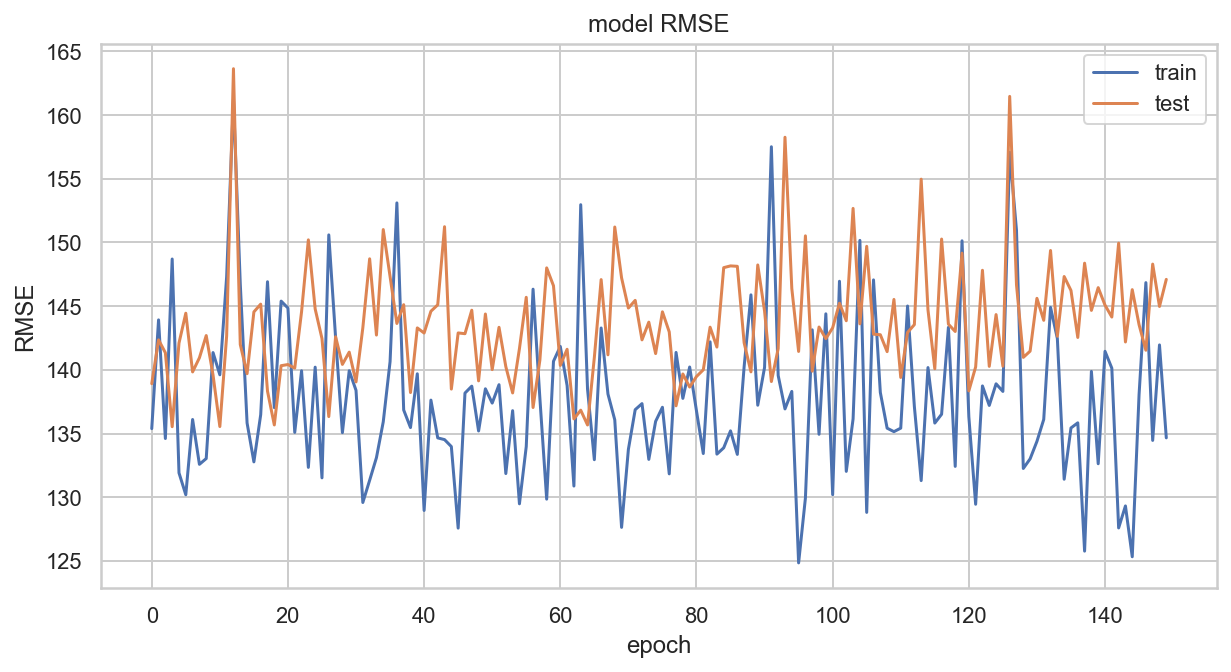

In [262]:
plt.plot(np.sqrt(history.history['mse']))
plt.plot(np.sqrt(history.history['val_mse']))

plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Ensembling models

#### Random Forest

In [98]:
# Base model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc=RandomForestRegressor(max_depth=2, random_state=13,n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

print("Testing RMSE: ", rmse_cv(rfc).mean())

Testing RMSE:  138.16301111954127


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Create the random grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)],
      #         'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(1, 10, num = 6)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              # 'bootstrap': [True, False]
              }

rf_gscv = GridSearchCV(estimator=RandomForestRegressor(random_state = 13),
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error', 
                       cv = 3, verbose=0, n_jobs=-1,
                       return_train_score=True)

rf_gscv.fit(X_train, y_train)


/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=13,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10],
 

In [106]:
model_rfr = rf_gscv.best_estimator_

y_pred = rf_gscv.predict(X_test)

In [107]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.16830897870511
Mean Squared Error: 13470.607353724065
Root Mean Squared Error: 116.06294565331376


#### XGboost

In [152]:
import xgboost as xgb

# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label= y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear","objective":"reg:linear"}
# Train the model: xg_reg
model_xgb = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)
# Predict the labels of the test set: preds
preds = model_xgb.predict(DM_test)
# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[23:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 126.089402


/Users/xueni/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [213]:
## Evaluate model quality

# Create the DMatrix: housing_dmatrix
spending_dmatrix = xgb.DMatrix(data=X, label=y)
# Create the parameter dictionary: params
params = {"objective":"reg:linear", 
          "max_depth":4,
         'eta':0.5}
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=spending_dmatrix, params=params, nfold=4, num_boost_round=5, 
                    metrics="rmse", as_pandas=True, seed=13)
# Print cv_results
print(cv_results)
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[00:55:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:55:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:55:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:55:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0       151.504631        3.906442      158.641357      11.839429
1       126.396652        3.146691      139.643879      10.609081
2       115.670284        3.479020      133.632811      11.712973
3       109.803421        3.301216      130.983614      11.806582
4       105.351015        3.681477      129.230606      12.581000
4    129.230606
Name: test-rmse-mean, dtype: float64


/Users/xueni/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/xueni/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:55:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


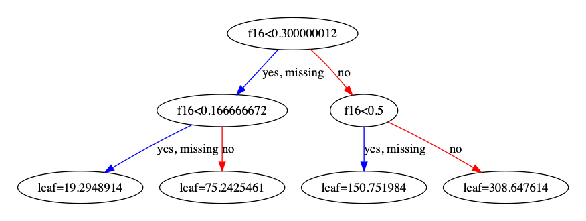

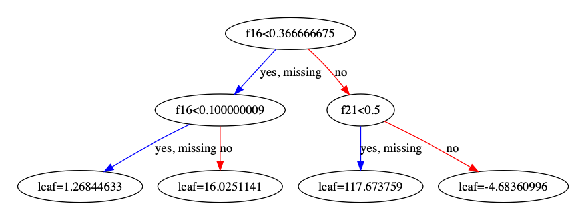

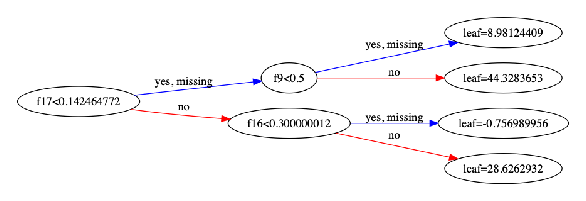

In [214]:
## Visualization

spending_dmatrix = xgb.DMatrix(data=X, label=y)
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
model_xgb = xgb.train(params=params, dtrain=spending_dmatrix, num_boost_round=10)
# Plot the first tree
xgb.plot_tree(model_xgb,num_trees=0)

plt.show()
# Plot the fifth tree
xgb.plot_tree(model_xgb,num_trees=4)
plt.show()
# Plot the last tree sideways
xgb.plot_tree(model_xgb,num_trees=9, rankdir='LR')
plt.show()

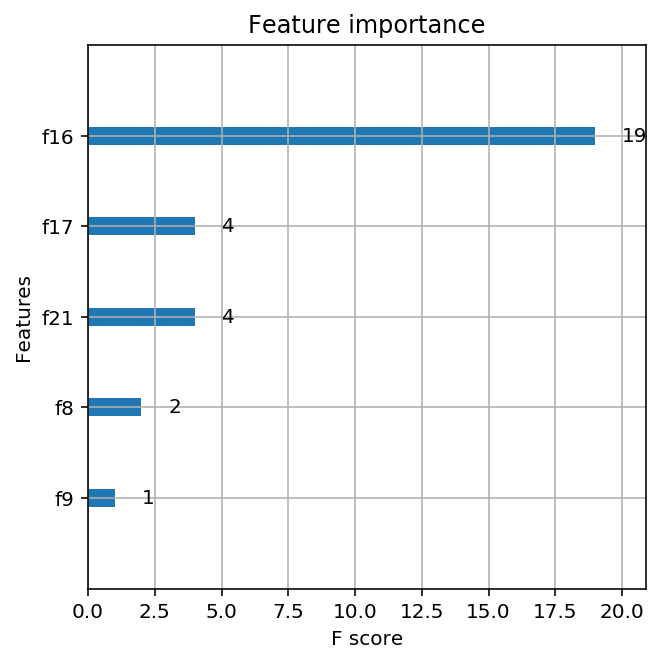

In [215]:
## Feature importance vis
xgb.plot_importance(model_xgb)
plt.show()

[00:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


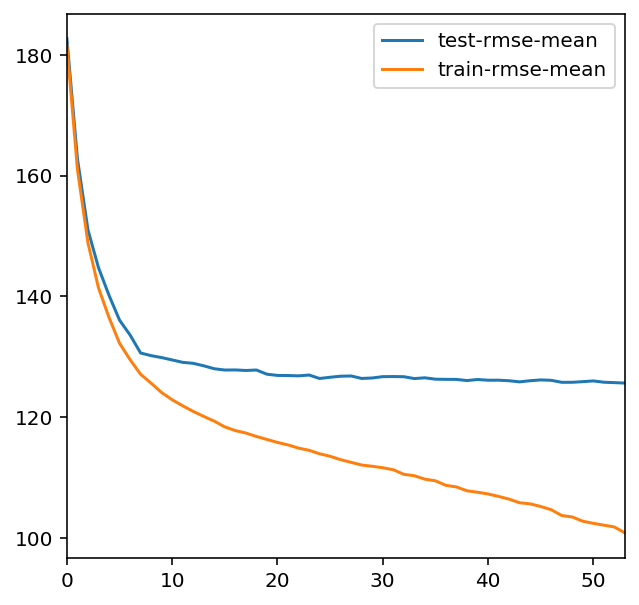

In [216]:
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

model.loc[0:,["test-rmse-mean", "train-rmse-mean"]].plot()

#### Gradient Boosting

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import learning_curve ,GridSearchCV,ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


gbrt=GradientBoostingRegressor(n_estimators=100)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)


def GradientBooster(param_grid, n_jobs):

    estimator = GradientBoostingRegressor()

    classifier = GridSearchCV(estimator=estimator,
                               param_grid=param_grid,
                              n_jobs=n_jobs,
                              scoring = 'neg_mean_squared_error')

    classifier.fit(X_train, y_train)
    print("Best Estimator learned through GridSearch")
    print(classifier.best_estimator_)

    return classifier.best_estimator_

In [120]:
param_grid={'n_estimators':[100,500,1000],
            'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth':[6,4,6],
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1]
           }
n_jobs=4
best_est=GradientBooster(param_grid, n_jobs)

/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Best Estimator Parameters
---------------------------
n_estimators: 1000
max_depth: 4


ValueError: incomplete format

In [158]:
model_gradBoost = best_est
print("Best Estimator Parameters and scores")
print("---------------------------")
print("n_estimators: %d" %best_est.n_estimators)
print("max_depth: %d" %best_est.max_depth)
print("Learning Rate:%.2f " %best_est.learning_rate)
print("min_samples_leaf: %d" %best_est.min_samples_leaf)
print("max_features: %.1f" %best_est.max_features)

print("Test R-squared: %.2f" %best_est.score(X_test,y_test))
print("Test rmse: %d" %rmse_test(best_est))

Best Estimator Parameters and scores
---------------------------
n_estimators: 1000
max_depth: 4
Learning Rate:0.01 
min_samples_leaf: 5
max_features: 0.3
Test R-squared: 0.62
Test rmse: 112


## Modeling II

In [127]:
new_data = data[data['Purchase']==1]

In [209]:
X2 = new_data.iloc[:,:-2]
y2 = new_data['Spending']

In [211]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.2, random_state=13)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.fit_transform(X_test2)
X2 = scaler.fit_transform(X2)

## Model Performance

In [280]:
seed = 13

model_linear = linear_model.LinearRegression()
model_ridge = Ridge(random_state=seed, tol=10)
model_lasso = Lasso(random_state=seed, tol=1)
model_rtree = DecisionTreeRegressor(max_depth = 2)

model_svr = SVR(kernel='linear', C=1000)

model_knn = neighbors.KNeighborsRegressor(n_neighbors=7)
model_mlp = create_mlp(X_train.shape[1], regress=True)
model_xgb = xgb.XGBRegressor(booster = 'gblinear',
                             n_estimators=300, 
                             max_depth=3, learning_rate=0.1)
model_gradBoost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=0.3, 
                          min_samples_leaf=5, min_samples_split=2,
                          n_estimators=1000)

In [199]:
models = [('linear',model_linear),
    ('Ridge',model_ridge),
          ('Lasso',model_lasso),
          ('Regression Tree',model_rtree),
          ('SVR',model_svr),
          ('KNN',model_knn),
      #    ('Neural Network',model_mlp),
          ('XGBoost',model_xgb),
          ('GradientBoost', model_gradBoost)]

##  Model Evaluation and Conclusion

For orignal dataset

In [231]:
rmse,names =[],[]

for name, model in models:
    cv_results = cross_val_score(model, X, y, 
                                 cv= 3,
                                 scoring='neg_mean_squared_error', 
                                 n_jobs=-1)
    names.append(name)
    rmse.append(np.sqrt(-cv_results.mean()))
   # msg = "%s rmse: %f (+/- %f)" % (name, np.sqrt(-cv_results.mean()),  np.sqrt(cv_results.std()))
    print('{0} rmse from cross validation: {1:.2f}'.format(name,np.sqrt(-cv_results.mean())))

linear rmse from cross validation: 128.25
Ridge rmse from cross validation: 128.92
Lasso rmse from cross validation: 128.57
Regression Tree rmse from cross validation: 146.23
SVR rmse from cross validation: 135.91
KNN rmse from cross validation: 170.06
XGBoost rmse from cross validation: 183.85
GradientBoost rmse from cross validation: 125.31


for cleaner dataset

In [232]:
rmse2,names =[],[]

for name, model in models:
    cv_results = cross_val_score(model, X2, y2, 
                                 cv= 3,
                                 scoring='neg_mean_squared_error', 
                                 n_jobs=-1)
    names.append(name)
    rmse2.append(np.sqrt(-cv_results.mean()))
   # msg = "%s rmse: %f (+/- %f)" % (name, np.sqrt(-cv_results.mean()),  np.sqrt(cv_results.std()))
    print('{0} rmse from cross validation: {1:.2f}'.format(name,np.sqrt(-cv_results.mean())))

linear rmse from cross validation: 165.20
Ridge rmse from cross validation: 166.26
Lasso rmse from cross validation: 164.52
Regression Tree rmse from cross validation: 176.75
SVR rmse from cross validation: 172.72
KNN rmse from cross validation: 209.56
XGBoost rmse from cross validation: 218.07
GradientBoost rmse from cross validation: 158.64


In [255]:
mlp_model.compile(optimizer = 'adam',loss = 'mse', metrics = ['mse'])

history = mlp_model.fit(X_train2, y_train2, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
scores = mlp_model.evaluate(X_test, y_test, batch_size=30)

800/800 [==============================] - 0s 139us/step


In [263]:
preds2 = mlp_model.predict(X_test2)
rmse_mlp2 = np.sqrt(np.mean((preds2.flatten()-y_test2)**2))
print('rmse on test dataset: {}'.format(rmse_mlp2))

rmse on test dataset: 163.28754813835155


In [274]:
rmse

137.32538802566705

In [271]:
names.append('Neural Network')
rmse.append(rmse_mlp)
rmse2.append(rmse_mlp2)

In [277]:
df_results = pd.DataFrame({'model':names,
                           'Original':rmse,
                           'Only Purchase':rmse2})

Text(0.5, 1.0, 'Model Comparison Across part a/b')

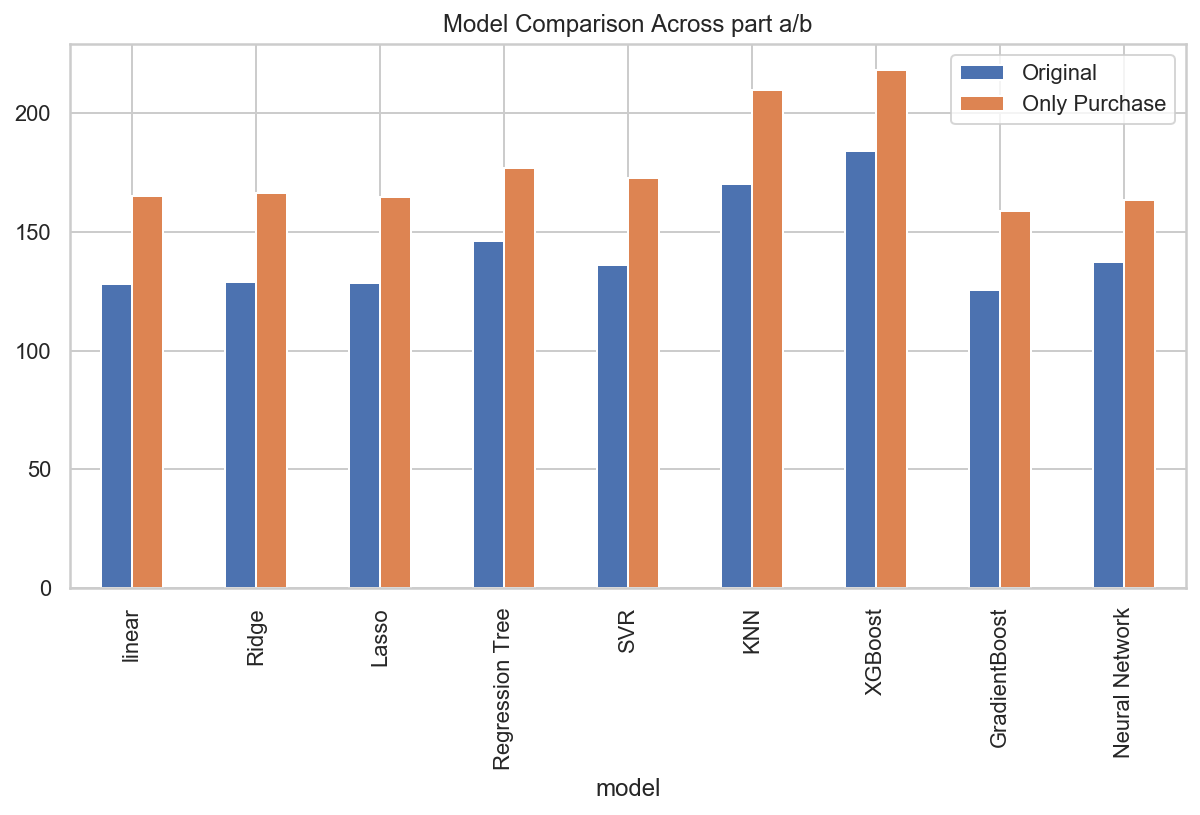

In [279]:
rcParams['figure.figsize'] = (10,5)
df_results.plot(kind = "bar",x='model')
plt.title("Model Comparison Across part a/b")

After fitting those regressors, we can see that we got the least error with Gradient Boosting for both dataset.


Models in part b generally get worse result than those in part a.
Main reason is that, in part a, we have so many 'helper' 0 labels, which are easy to predict for numerical predictive models, improving the overall performance. That is, when predicting data points in 'Non purchase' category, the algorithm actually predicting a real number very close to zero, so error for those points is small and therefore boosting the performance of models. 